In [1]:
# Final merger time for the reference systems with masses m_1 = 1e5 M_solar
# and m_2 = 1 M_solar, as a function of the initial 
# angular momentum j0 for binaries having Power Law PDF (1-1e5) for PBHs having alpha-disk 
# with dynamical friction (Ostriker) as dissipative force.

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma
from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces
import imripy.constants as c

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
solar_mass_to_pc = 4.8e-14
year_to_pc = 0.3064



π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



#1.) SystemProp(m1, m2, halo, D=D, inclination_angle = 0., pericenter_angle=0.,
# baryonicHalo=None, includeHaloInTotalMass=False):
    
#2.) EvolutionOptions(accuracy=1e-10, verbose=1, elliptic=True, m2_change=False,
# dissipativeForces=None, gwEmissionLoss = True, dynamicalFrictionLoss = True,
# considerRelativeVelocities=False, progradeRotation = True, **kwargs)

#3.) Evolve(sp, a_0, e_0=0., a_fin=0., t_0=0., t_fin=None, opt=EvolutionOptions())
# t_fin = None means t_fin = Time of coalescence on the system.


 
#4.) opt_0 = EvolutionOptions(accuracy=1e-10, verbose=1, elliptic=True, m2_change=False,
# dissipativeForces=None, gwEmissionLoss = True, dynamicalFrictionLoss = True,
# considerRelativeVelocities=False, progradeRotation = True)or 
# or
#4.) opt_0 = inspiral.Classic.EvolutionOptions(dynamicalFrictionLoss=False, verbose=1, accuracy=1e-10)

a0 =  2.8659e-05 pc
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1689s
here
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.9999991948686621  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/inspiral.py:329: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)


A termination event occurred.
 -> Evolution took 0.1448s
here
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.9999987035272608  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1451s
here
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.9999979123383526  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1446s
here
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.9999966383155813  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1444s
here
Evolving from  995.095345711603  to  1.0 r_isco  with initial eccentricity 0.9999945868016793  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1453s
here
Evolving from  995

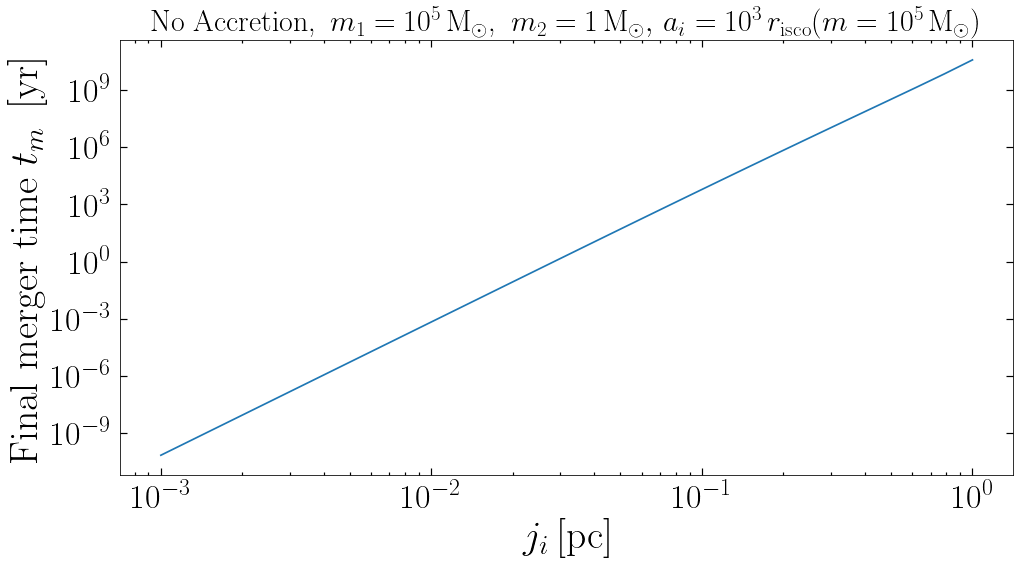

In [5]:
# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e5 solar mass and m_2 = 1 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(1, 1e5, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1, 1e5, 5)
m2_arr = np.geomspace(1, 1e5, 5)
   


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = 1e3 * ((6 * G * m1_arr[-1])/(c**2))      #a_i = 1000(r_isco of m1 = 1e5 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
j0_arr = np.geomspace(1e-3, 1, 30) 


    

fig,ax = plt.subplots(1, figsize = (16, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')



tm_arr_0_1 = np.zeros(len(j0_arr))
T_arr = np.zeros(len(j0_arr))

for k, j0 in enumerate(j0_arr):
    D = 0
    accuracy = 1e-10
    e0 =  np.sqrt(1 - (j0_arr[k]**2))
    sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
    opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
            gwEmissionLoss = True, dynamicalFrictionLoss = False)
    R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
    
    m1_ref = 1 * solar_mass_to_pc  # in units of solar mass
    T = 1e-6 * (t_m * year_to_pc ) * ((m1/m1_ref)**(-1))
    ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0, t_fin = T, opt = opt_0)   
    t_merge = ev_0.t[-1]
    
    print("here")
    while np.isclose(T, t_merge) == True: 
        T = T * 1000
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0,  t_fin = T, opt = opt_0)   
        t_merge = ev_0.t[-1]
     
    tm_arr_0_1[k]  =  t_merge/year_to_pc
    T_arr[k] =  T/year_to_pc
    np.savez("tmofji_gw1",  j0_arr,  tm_arr_0_1)


    
ax.loglog(j0_arr, tm_arr_0_1, color = 'C0',   linestyle = '-')
slope_0, intercept_0 = np.polyfit(np.log(j0_arr), np.log(tm_arr_0_1), 1)
print('\v')
print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)




ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xlabel('$j_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{5} \, \mathrm{M_{\odot}}$,\: $m_{2}= 1 \,  \mathrm{M_{\odot}}, \, a_{i} = 10^{3}\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}})$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ji_gw1.pdf', bbox_inches='tight')
plt.show()

a0 =  2.8659e-05 pc
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1178s
here
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9999991948686621  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/inspiral.py:329: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)


A termination event occurred.
 -> Evolution took 0.1196s
here
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9999987035272608  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1144s
here
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9999979123383526  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1174s
here
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9999966383155813  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1174s
here
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9999945868016793  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1167s
here
Evolving from 

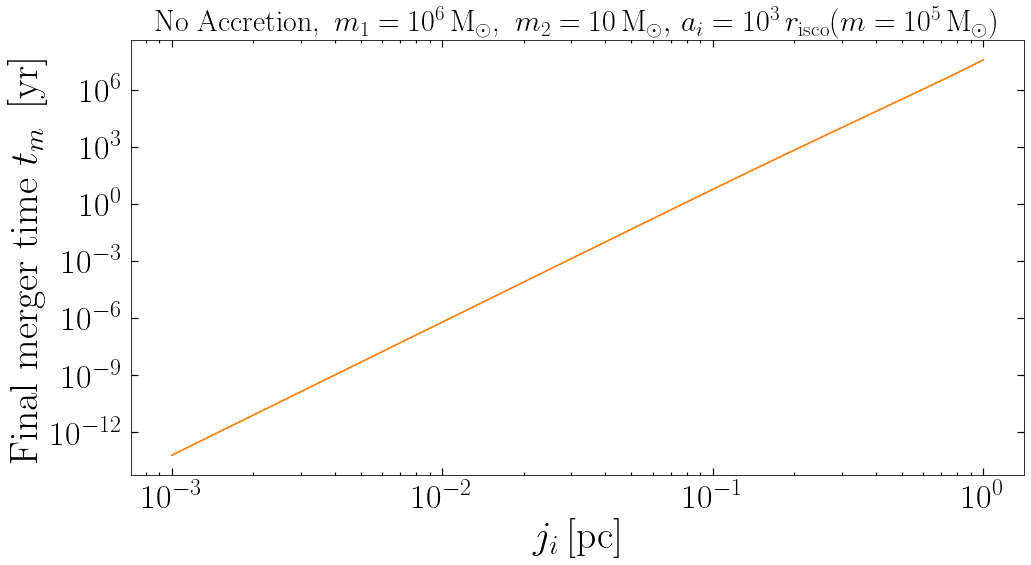

In [6]:
# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e6 solar mass and m_2 = 10 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(10, 1e6, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(10, 1e6, 5)
m2_arr = np.geomspace(10, 1e6, 5)
   


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = 1e3 * ((6 * G * 1e5)/(c**2))      #a_i = 1000(r_isco of m1 = 1e5 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
j0_arr = np.geomspace(1e-3, 1, 30) 


    

fig,ax = plt.subplots(1, figsize = (16, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
tm_arr_0_2 = np.zeros(len(j0_arr))
T_arr = np.zeros(len(j0_arr))

for k, j0 in enumerate(j0_arr):
    D = 0
    accuracy = 1e-10
    e0 =  np.sqrt(1 - (j0_arr[k]**2))
    sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
    opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
            gwEmissionLoss = True, dynamicalFrictionLoss = False)
    R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
    
    m1_ref = 1 * solar_mass_to_pc  # in units of solar mass
    T = 1e-9 * (t_m * year_to_pc ) * ((m1/m1_ref)**(-1))
    ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0, t_fin = T, opt = opt_0)   
    t_merge = ev_0.t[-1]
    
    print("here")
    while np.isclose(T, t_merge) == True: 
        T = T * 1000
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0,  t_fin = T, opt = opt_0)   
        t_merge = ev_0.t[-1]
     
    tm_arr_0_2[k]  =  t_merge/year_to_pc
    T_arr[k] =  T/year_to_pc
    np.savez("tmofji_gw2",  j0_arr,  tm_arr_0_2)


    
ax.loglog(j0_arr, tm_arr_0_2, color = 'C1',   linestyle = '-')
slope_0, intercept_0 = np.polyfit(np.log(j0_arr), np.log(tm_arr_0_2), 1)
print('\v')
print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)




ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xlabel('$j_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{6} \, \mathrm{M_{\odot}}$,\: $m_{2}= 10 \,  \mathrm{M_{\odot}}, \, a_{i} = 10^{3}\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}})$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ji_gw2.pdf', bbox_inches='tight')
plt.show()

a0 =  2.8659e-05 pc
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1717s
here
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.9999991948686621  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/inspiral.py:329: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)


A termination event occurred.
 -> Evolution took 0.1702s
here
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.9999987035272608  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1708s
here
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.9999979123383526  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1746s
here
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.9999966383155813  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1841s
here
Evolving from  9950.953457116031  to  1.0 r_isco  with initial eccentricity 0.9999945868016793  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1829s
here
Evolving from 

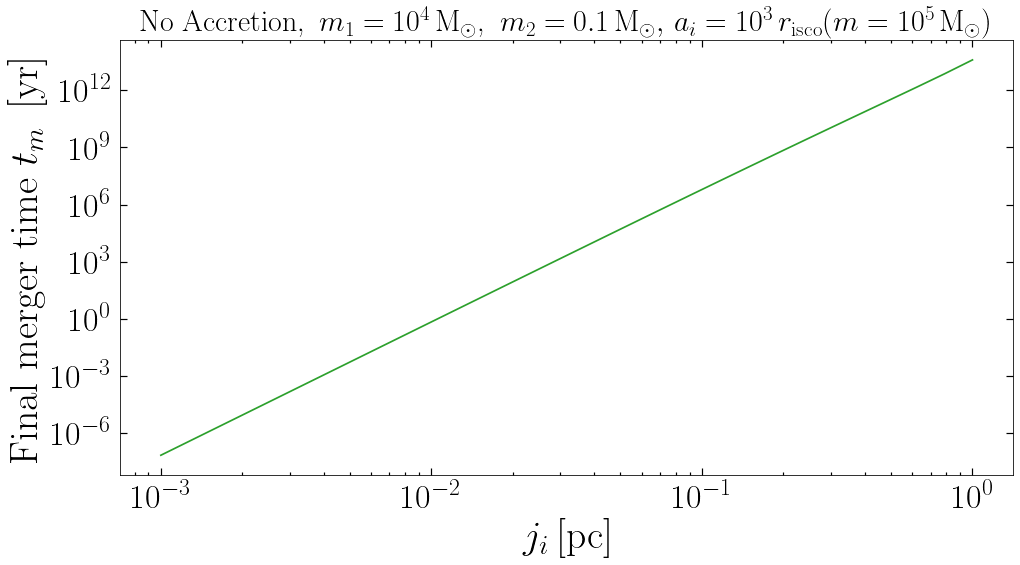

In [7]:
# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e4 solar mass and m_2 = 0.1 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(0.1, 1e4, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(0.1, 1e4, 5)
m2_arr = np.geomspace(0.1, 1e4, 5)
   


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = 1e3 * ((6 * G * 1e5)/(c**2))      #a_i = 1000(r_isco of m1 = 1e5 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
j0_arr = np.geomspace(1e-3, 1, 30) 


    

fig,ax = plt.subplots(1, figsize = (16, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
tm_arr_0_3 = np.zeros(len(j0_arr))
T_arr = np.zeros(len(j0_arr))

for k, j0 in enumerate(j0_arr):
    D = 0
    accuracy = 1e-10
    e0 =  np.sqrt(1 - (j0_arr[k]**2))
    sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
    opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
            gwEmissionLoss = True, dynamicalFrictionLoss = False)
    R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
    
    m1_ref = 1 * solar_mass_to_pc  # in units of solar mass
    T = 1e-6 * (t_m * year_to_pc ) * ((m1/m1_ref)**(-1))
    ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0, t_fin = T, opt = opt_0)   
    t_merge = ev_0.t[-1]
    
    print("here")
    while np.isclose(T, t_merge) == True: 
        T = T * 1000
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin = R_fin_0,  t_fin = T, opt = opt_0)   
        t_merge = ev_0.t[-1]
     
    tm_arr_0_3[k]  =  t_merge/year_to_pc
    T_arr[k] =  T/year_to_pc
    np.savez("tmofji_gw3",  j0_arr,  tm_arr_0_3)


    
ax.loglog(j0_arr, tm_arr_0_3, color = 'C2',   linestyle = '-')
slope_0, intercept_0 = np.polyfit(np.log(j0_arr), np.log(tm_arr_0_3), 1)
print('\v')
print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)




ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xlabel('$j_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{4} \, \mathrm{M_{\odot}}$,\: $m_{2}= 0.1 \,  \mathrm{M_{\odot}}, \, a_{i} = 10^{3}\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}})$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ji_gw3.pdf', bbox_inches='tight')
plt.show()

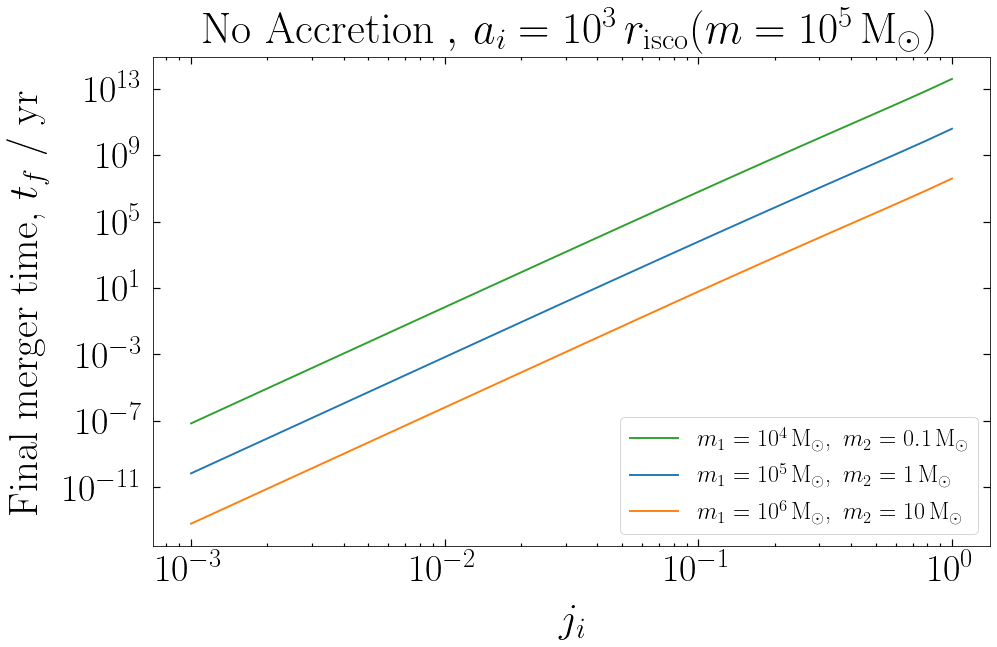

In [18]:
fig,ax = plt.subplots(1, figsize = (15, 9))
plt.rc('lines', linewidth = 1.9)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3)
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7)

 

file1 = np.load('tmofji_gw1.npz')
j0_arr = file1['arr_0']
tm_arr_0_1 = file1['arr_1']

file2 = np.load('tmofji_gw2.npz')
j0_arr = file2['arr_0']
tm_arr_0_2 = file2['arr_1']


file3 = np.load('tmofji_gw3.npz')
j0_arr = file3['arr_0']
tm_arr_0_3 = file3['arr_1']


ax.loglog(j0_arr, tm_arr_0_3, 'C2')
ax.loglog(j0_arr, tm_arr_0_1, 'C0')
ax.loglog(j0_arr, tm_arr_0_2, 'C1')


ax.tick_params(axis='x', pad= 8.9)
ax.tick_params(axis='y', pad= 8.9)


#plt.text(3e-3, 1.5e7, '$m_{i} = 1\: \mathrm{M_{\odot}}$', fontsize = 38)
#plt.text(3e-3, 6e6, r'$a_{i} = 1.67\times10^{2}\: \mathrm{pc}$', fontsize = 38)

plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$j_{i}$', fontsize = 41, labelpad = 15)
plt.ylabel('Final merger time, $t_{f}$ / yr', fontsize = 41, labelpad = 15)
plt.legend(["$m_{1} = 10^{4} \, \mathrm{M_{\odot}}$,\: $m_{2}= 0.1\,  \mathrm{M_{\odot}}$","$\, m_{1} = 10^{5} \, \mathrm{M_{\odot}}$,\: $m_{2}= 1\,  \mathrm{M_{\odot}}$",
            "$\, m_{1} = 10^{6} \, \mathrm{M_{\odot}}$,\: $m_{2}= 10\,  \mathrm{M_{\odot}}$"], 
           prop = {'size':24}, facecolor = 'white',loc='lower right',shadow = False, fontsize=350)

plt.title(r'No Accretion $, \,a_{i} = 10^{3}\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}})$', fontsize = 44, pad = 14)
plt.savefig('tm_vs_ji_gw.pdf', bbox_inches="tight")
plt.show()